<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML-Project/blob/main/0001_Sentiment_Analysis_Drug_review_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt # plotting

In [7]:
def load_dataset(file_path, num_samples):
    df = pd.read_csv(file_path, usecols=[3, 4], nrows=num_samples)
    df.columns = ['review', 'rating']

    text = df['review'].tolist()
    text = [str(t).encode('ascii', 'replace') for t in text]
    text = np.array(text, dtype=object)[:]
    
    labels = df['rating'].tolist()
    labels = [1 if i>=7 else 0 if i>=5 else -1 for i in labels]
    labels = np.array(pd.get_dummies(labels), dtype=int)[:] 

    return labels, text

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
tmp_labels, tmp_text = load_dataset('/content/gdrive/MyDrive/archive/drugsComTrain_raw.csv', 568454)
tmp_text.shape

(161297,)

In [12]:
test_labels, test_text = load_dataset('/content/gdrive/MyDrive/archive/drugsComTest_raw.csv',60000)
test_text.shape

(53766,)

In [13]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", output_shape=[50], 
                           input_shape=[], dtype=tf.string, name='input', trainable=False)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax', name='output'))
model.compile(loss='categorical_crossentropy',
                  optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (KerasLayer)           (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 1024)              132096    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
output (Dense)               (None, 3)                 3075      
Total params: 124,777,859
Trainable params: 135,171
Non-trainable params: 124,642,688
_________________________________________________________________


In [14]:
print("Training the model ...")
history = model.fit(test_text,test_labels, batch_size = 128, epochs=50, verbose=1,
              validation_data=(test_text,test_labels),)

Training the model ...
Epoch 1/50
421/421 [==============================] - 7s 16ms/step - loss: 0.7990 - accuracy: 0.6692 - val_loss: 0.7383 - val_accuracy: 0.6950
Epoch 2/50
421/421 [==============================] - 6s 15ms/step - loss: 0.7390 - accuracy: 0.6971 - val_loss: 0.7181 - val_accuracy: 0.7085
Epoch 3/50
421/421 [==============================] - 7s 16ms/step - loss: 0.7221 - accuracy: 0.7067 - val_loss: 0.7065 - val_accuracy: 0.7120
Epoch 4/50
421/421 [==============================] - 7s 16ms/step - loss: 0.7046 - accuracy: 0.7120 - val_loss: 0.6826 - val_accuracy: 0.7236
Epoch 5/50
421/421 [==============================] - 7s 16ms/step - loss: 0.6918 - accuracy: 0.7208 - val_loss: 0.6846 - val_accuracy: 0.7197
Epoch 6/50
421/421 [==============================] - 7s 16ms/step - loss: 0.6800 - accuracy: 0.7251 - val_loss: 0.6561 - val_accuracy: 0.7370
Epoch 7/50
421/421 [==============================] - 7s 15ms/step - loss: 0.6615 - accuracy: 0.7342 - val_loss: 0.6511

In [22]:
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

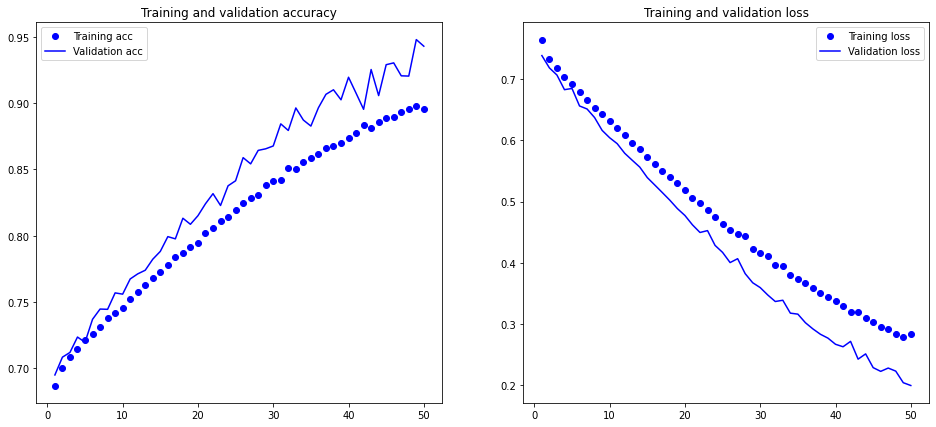

In [23]:
plot_history(history)

In [24]:
model.predict(['im feeling sick'])

array([[9.9235958e-01, 2.3562816e-04, 7.4048019e-03]], dtype=float32)

In [15]:
model.predict(['im feeling bad'])

array([[0.5181459 , 0.15281764, 0.3290365 ]], dtype=float32)